# Sleep Analysis

A study of sleep efficiency, and sleep patterns.

## About Dataset

The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

There are 452 observations of 14 variables.  Awakenings has 20 missing values, Caffeine consumption has 25 missing values, Alcohol consumption has 14 missing values, Exercise frequency has 6 missing values.

## Objective

A typical adult needs 1.5 to 2 hours of deep sleep and 1.5 to 2 hours of REM sleep. There is no minimum amout of light sleep defined for a quality night of sleep. A label will be created called Sleep Quality that defines the provides percentage of required sleep achieved. In the case of someone with at least 1.5 hours of deep sleep and 1.5 hours of REM sleep they will receive a Sleep Quality rating of 100%. If someone has 1 hour of deep sleep and 1.5 hours of REM sleep they will receive a Sleep Quality rating of 83%.

$Sleep Quality = \frac{\min\{\frac{Deep Sleep}{1.5}, 1\} + \min\{\frac{REM Sleep}{1.5}, 1\}}{2}*100$

The objective of this analysis will be to determine which features impact the Sleep Quality the most and to be able to predict the sleep quality.

In [63]:
from IPython.display import clear_output

In [64]:
%%time
%pip install kagglehub
%pip install ipywidgets
%pip install pandas
%pip install seaborn
%pip install plotly
%pip install statsmodels
%pip install nbformat>=4.2.0
clear_output()

CPU times: total: 125 ms
Wall time: 7.64 s


In [65]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("equilibriumm/sleep-efficiency")
destination = r"data"
for item in os.listdir(path):
    src = os.path.join(path, item)
    dest = os.path.join(destination, item)
    if os.path.isdir(src):
        shutil.copytree(src, dest, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dest)

In [66]:
import pandas as pd

sleep_df = pd.read_csv(r"data\Sleep_Efficiency.csv").set_index("ID")
sleep_df["Bedtime"] = pd.to_datetime(sleep_df["Bedtime"]).dt.time
sleep_df["Wakeup time"] = pd.to_datetime(sleep_df["Wakeup time"]).dt.time
sleep_df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
4,40,Female,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
5,57,Male,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
449,52,Male,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,40,Female,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0


In [67]:
sleep_df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [68]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage

In [69]:
sleep_df["Sleep Quality"] = sleep_df.apply(
    lambda row: (
        min((row["Sleep duration"] * row["REM sleep percentage"] / 100) / 1.5, 1)
        + min((row["Sleep duration"] * row["Deep sleep percentage"] / 100) / 1.5, 1)
    )
    / 2
    * 100,
    axis=1,
)
sleep_df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep Quality
ID,,,,,,,,,,,,,,,
1,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,86.000000
2,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,94.333333
3,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,100.000000
4,40,Female,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,96.000000
5,57,Male,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,100.000000
449,52,Male,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,100.000000
450,40,Female,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,100.000000


## Exploratory Data Analysis



In [70]:
import plotly.express as px

continous_columns = (
    "Bedtime",
    "Wakeup time",
    "Sleep duration",
    "Sleep efficiency",
    "REM sleep percentage",
    "Deep sleep percentage",
    "Light sleep percentage",
    "Awakenings",
    "Caffeine consumption",
    "Alcohol consumption",
    "Exercise frequency",
)

for col in continous_columns:
    fig1 = px.scatter(sleep_df, col, "Sleep Quality")
    fig1.show()

In [71]:
cat_columns = ("Age", "Gender", "Smoking status")

for col in cat_columns:
    fig2 = px.box(sleep_df, col, "Sleep Quality")
    fig2.show()

<Axes: >

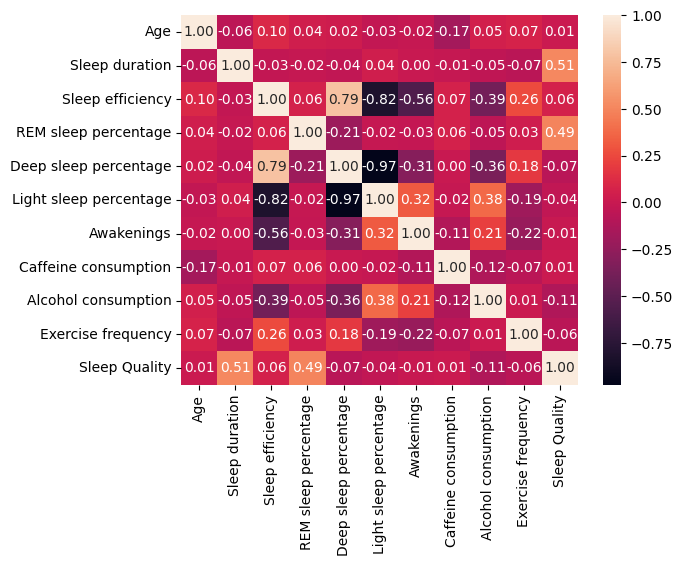

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(sleep_df.corr(numeric_only=True), annot=True, fmt=".2f")

## Linear Models

A linear regression model, Ridge Regression model, and LASSO Regression model model will be used to evaluate the sleep variables and predict sleep quality.

In [148]:
random_state = 619
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from scipy import stats
import numpy as np

### Pre-process the X and y variables

The X and y variables are split with 67% training and 33% test. The numerical variables are scaled with a StandardScaler and the categorical variables are One Hot Encoded.

In [188]:
def pre_process(X, y):
    column_names = X.columns
    numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_cols),
            ("cat", OneHotEncoder(), categorical_cols),
        ]
    )

    X = preprocessor.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=random_state
    )

    return (X_train, X_test, y_train, y_test, column_names)

### Model Evaluation

The models are evaluated using Mean Square Error (MSE) and $R^2$.

In [189]:
def evaluate_model(X_train, X_test, y_train, y_test, column_names, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    model_r2score = r2_score(y_true=y_test, y_pred=y_pred)

    try:
        coeff = model.coef_
    except AttributeError:
        coeff = {}

    return model_mse, model_r2score, y_pred, y_test, dict(zip(column_names, coeff))

### Check Assumptions

For linear models to work well the linear relationship between the predicted values and the residuals are shown in a scatterplot. A QQ plot is also used to show the distribution of the residuals.

In [190]:
def check_assumptions(y_pred, y_true):
    sns.scatterplot(x=y_pred, y=(y_true - y_pred))
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    sm.qqplot((y_true - y_pred), line="s")

### Linear Regression

A linear regression model with the missing data filled with 0s.

In [242]:
X0 = sleep_df.drop("Sleep Quality", axis=1).fillna(0)
y0 = sleep_df.loc[:, "Sleep Quality"]

Linear Regression model with missing values set to 0 has a MSE of 7.222323612686768 and R2 of 0.5357704019079741
Age 0.06173248443603579
Gender 2.04483456920243
Bedtime 0.16736556331293212
Wakeup time 1.867374020246747
Sleep duration -0.12764675906541129
Sleep efficiency -0.2994762065734418
REM sleep percentage 0.1593661196912896
Deep sleep percentage -0.03884274748018612
Light sleep percentage -0.17585910430659019
Awakenings -0.29199218308698954
Caffeine consumption 0.226575044276577
Alcohol consumption -0.22657504427651426
Smoking status -1.2186546947989225
Exercise frequency -1.9833955057252282


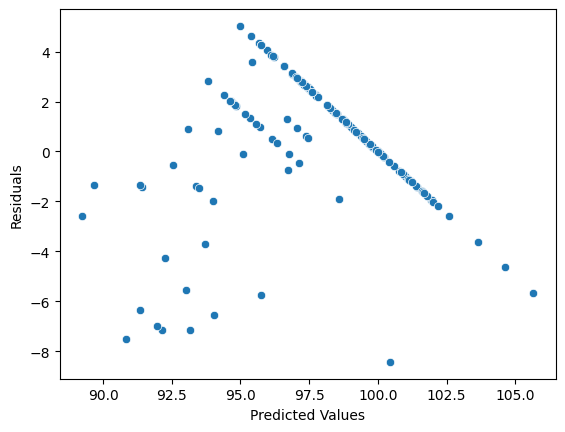

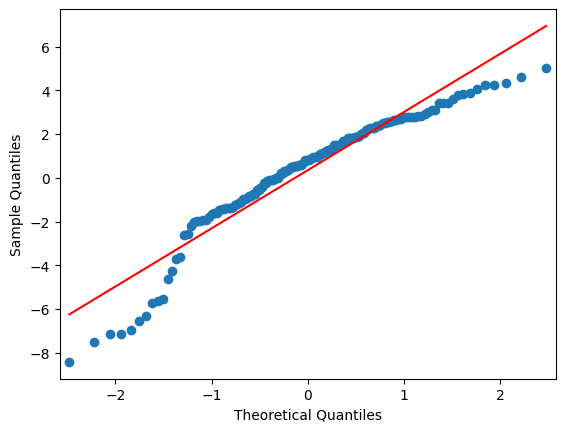

In [243]:
X_train, X_test, y_train, y_test, column_names = pre_process(X0, y0)

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train, X_test, y_train, y_test, column_names, LinearRegression()
)
print(
    f"Linear Regression model with missing values set to 0 has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

Linear Regression with missing values filled with the mean value of the column.

In [244]:
X = sleep_df.copy().drop("Sleep Quality", axis=1)
X["Awakenings"] = X["Awakenings"].fillna(X["Awakenings"].mean())
X["Alcohol consumption"] = X["Alcohol consumption"].fillna(
    X["Alcohol consumption"].mean()
)
X["Caffeine consumption"] = X["Caffeine consumption"].fillna(
    X["Caffeine consumption"].mean()
)
X["Exercise frequency"] = X["Exercise frequency"].fillna(X["Exercise frequency"].mean())
y = sleep_df.copy().loc[:, "Sleep Quality"]

Linear Regression model with missing values set to mean has a MSE of 7.209592837346585 and R2 of 0.5365886984890346
Age 0.050451263790254094
Gender 2.0322538403842088
Bedtime 0.25634963073246697
Wakeup time 1.8526635138838785
Sleep duration -0.15146263299125012
Sleep efficiency -0.2717435917130947
REM sleep percentage 0.24362780316363933
Deep sleep percentage -0.10587630423462567
Light sleep percentage -0.25218635141060036
Awakenings -0.3347781743399279
Caffeine consumption 0.22568674699736713
Alcohol consumption -0.22568674699736357
Smoking status -1.2537490492098418
Exercise frequency -1.9707056227511428


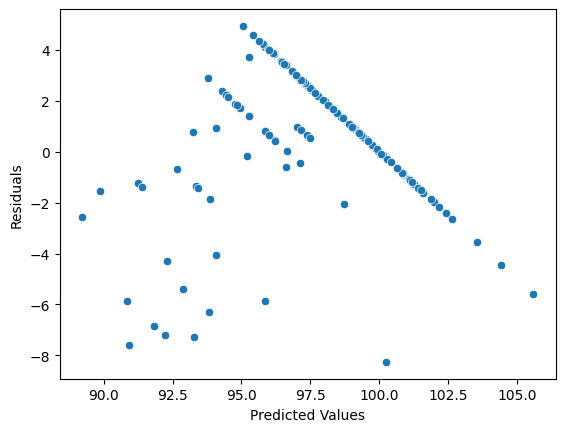

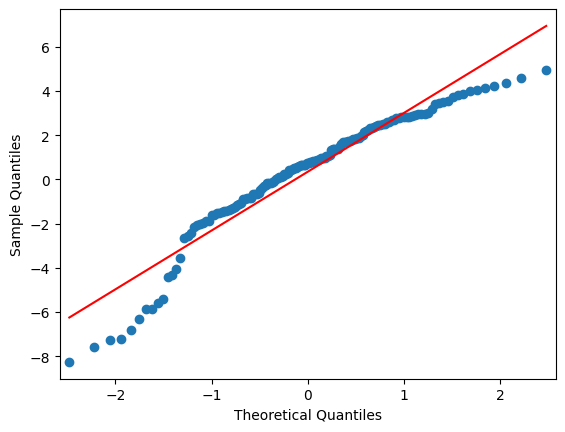

In [245]:
X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train, X_test, y_train, y_test, column_names, LinearRegression()
)
print(
    f"Linear Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Ridge Regression

A gridsearch is used to find the best alpha value.

In [246]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

grid_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={"alpha": [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]},
    cv=5,
)

grid_ridge.fit(X_train, y_train)
print("Best parameters found: ", grid_ridge.best_params_)

# Print the best score
print("Best score found: ", grid_ridge.best_score_)

Best parameters found:  {'alpha': 100}
Best score found:  0.4248767498507142


Ridge Regression model with alpha=100 and missing values set to mean has a MSE of 8.554835904570597 and R2 of 0.45012045337516504
Age 0.037502421676510564
Gender 1.5220283918994515
Bedtime 0.16518848675282322
Wakeup time 1.3689276537090385
Sleep duration -0.1145790929271181
Sleep efficiency -0.19806750740918733
REM sleep percentage 0.22450871069855702
Deep sleep percentage -0.03945570765929348
Light sleep percentage -0.18843224060805583
Awakenings -0.1535608912506679
Caffeine consumption 0.2596584509877318
Alcohol consumption -0.2596584509877318
Smoking status -0.1509481759646736
Exercise frequency -0.19562335764874988


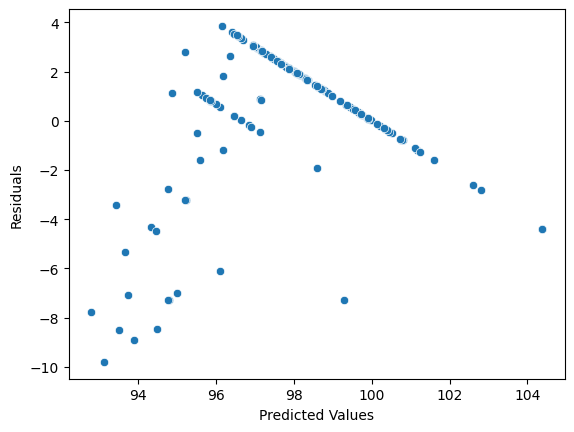

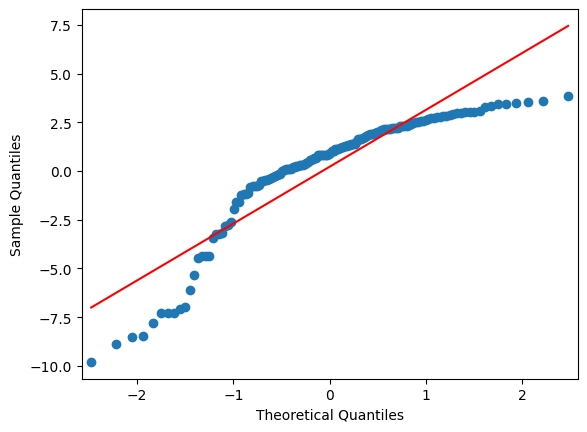

In [247]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    Ridge(alpha=grid_ridge.best_params_.get("alpha")),
)

print(
    f"Ridge Regression model with alpha={grid_ridge.best_params_.get('alpha')} and missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Lasso Regression

A gridsearch is used to find the best alpha value.

In [248]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

grid_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={"alpha": [0.0001, 0.001, 0.01, 0.1, 1]},
    cv=5,
)

grid_lasso.fit(X_train, y_train)
print("Best parameters found: ", grid_lasso.best_params_)

# Print the best score
print("Best score found: ", grid_lasso.best_score_)

Best parameters found:  {'alpha': 0.1}
Best score found:  0.4242075662617948


Lasso Regression model with alpha=0.1 and missing values set to mean has a MSE of 8.187534144163692 and R2 of 0.4737295240505178
Age 0.0
Gender 1.988379314750031
Bedtime 0.0
Wakeup time 1.7463176525802515
Sleep duration 0.0
Sleep efficiency -0.17510705302179586
REM sleep percentage 0.11912850079023736
Deep sleep percentage -0.0
Light sleep percentage -0.14143444705797356
Awakenings -0.0800486153297809
Caffeine consumption 0.3452013343096247
Alcohol consumption -0.0
Smoking status -0.0
Exercise frequency -0.17857941071165773


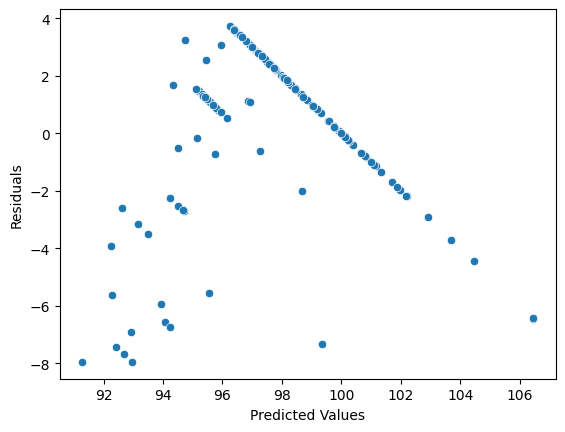

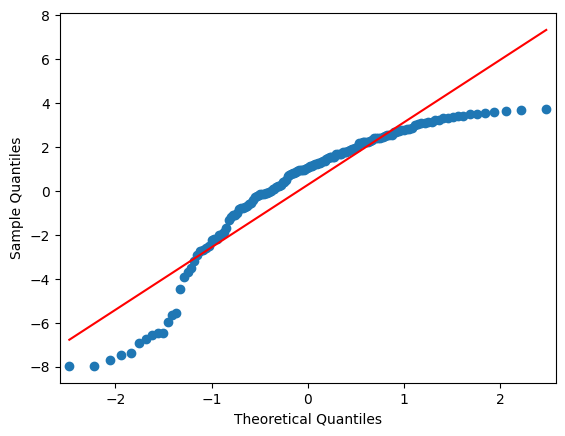

In [249]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    Lasso(alpha=grid_lasso.best_params_.get("alpha")),
)
print(
    f"Lasso Regression model with alpha={grid_lasso.best_params_.get('alpha')} and missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

## Non linear regression

The data does not appear to be linear so some nonlinear approaches will be used to identify a better model for prediction.

### Support Vector Machine for Regression

A gridsearch is used to find the best kernel, degree for the polynomial kernel, and the value of C.

In [250]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

grid_svm = GridSearchCV(
    estimator=SVR(),
    param_grid={
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "degree": [1, 2, 3, 4, 5],
        "C": [0.1, 1, 10, 100],
    },
    cv=5,
)

grid_svm.fit(X_train, y_train)
print("Best parameters found: ", grid_svm.best_params_)

print("Best score found: ", grid_svm.best_score_)

Best parameters found:  {'C': 10, 'degree': 2, 'kernel': 'poly'}
Best score found:  0.763620770122653


In [251]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    SVR(C=10, degree=2, kernel="poly"),
)
print(
    f"Support Vector Machine Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

Support Vector Machine Regression model with missing values set to mean has a MSE of 3.0452155483709746 and R2 of 0.8042625523397249


### Polynomial Features

Since the polynomial SVM kernel is the best polynomial Linear Regression will be revisited with Polynomial features.

In [252]:
from sklearn.preprocessing import PolynomialFeatures


def pre_process_poly(X, y):
    column_names = X.columns
    # Define the numerical and categorical columns
    numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns

    # Create the preprocessor with polynomial features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_cols),
            ("poly", PolynomialFeatures(2), numerical_cols),
            ("cat", OneHotEncoder(), categorical_cols),
        ]
    )

    # Apply the preprocessor to the original DataFrame X
    X = preprocessor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=random_state
    )

    return (X_train, X_test, y_train, y_test, column_names)

### Linear Regression with missing values set to 0 using Polynomial Features


Linear Regression model with missing values set to 0 has a MSE of 2.997369377856292 and R2 of 0.8073379626507855
Age -2.5252151838065284e-06
Gender 0.006299989231257348
Bedtime 0.07989228469380942
Wakeup time 0.00010629718996247548
Sleep duration -1.103674026110531e-05
Sleep efficiency -1.3192686165438438e-05
REM sleep percentage 0.0005156003392710537
Deep sleep percentage 2.5630651231825854e-07
Light sleep percentage -9.30580349803832e-06
Awakenings -0.00029525086649363807
Caffeine consumption -5.736069605410954e-12
Alcohol consumption -3.322596134861834e-05
Smoking status 0.005453684761597154
Exercise frequency 0.010792440399839176


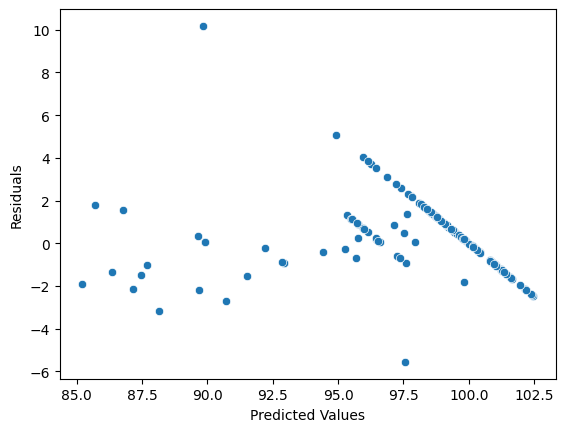

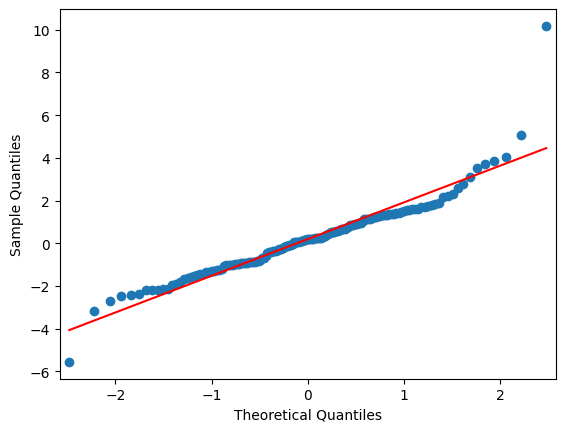

In [253]:
X_train, X_test, y_train, y_test, column_names = pre_process_poly(X0, y0)

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train, X_test, y_train, y_test, column_names, LinearRegression()
)
print(
    f"Linear Regression model with missing values set to 0 has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Linear Regression with missing values set to the mean using Polynomial Features

Linear Regression model with missing values set to mean has a MSE of 2.969658149692173 and R2 of 0.8091191584269852
Age -1.5248891230051161e-06
Gender 0.006491578023651583
Bedtime 0.042953402802862806
Wakeup time 0.00011063211714722865
Sleep duration -1.0800063563215067e-05
Sleep efficiency -1.443272910853742e-05
REM sleep percentage 0.0004168887391812889
Deep sleep percentage 4.816369445401723e-07
Light sleep percentage -5.378412552973014e-05
Awakenings -0.00020473717921594002
Caffeine consumption -3.6094478100823224e-13
Alcohol consumption -2.0063990173951364e-05
Smoking status 0.005619536624375367
Exercise frequency 0.0058024631729424025


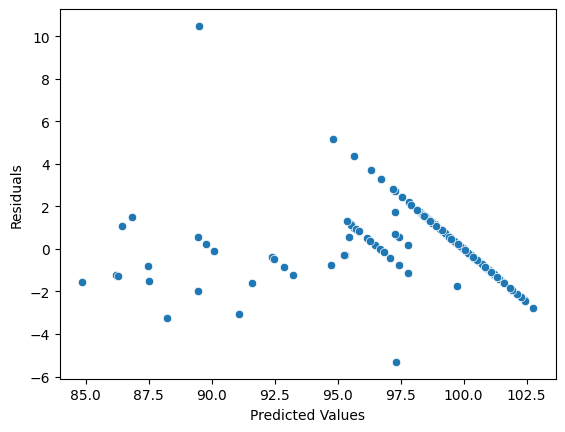

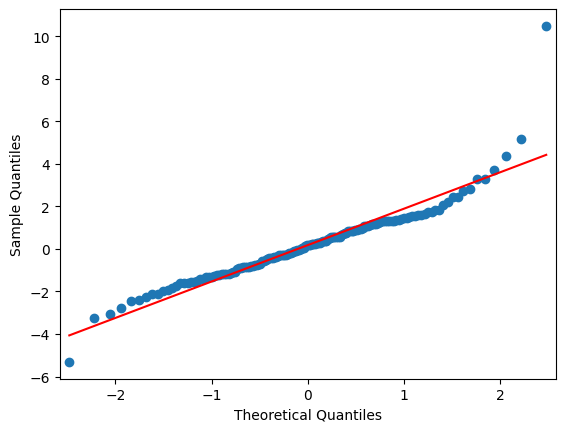

In [254]:
X_train, X_test, y_train, y_test, column_names = pre_process_poly(X, y)

model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train, X_test, y_train, y_test, column_names, LinearRegression()
)
print(
    f"Linear Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Ridge Regression with Polynomial Features

In [255]:
X_train, X_test, y_train, y_test, column_names = pre_process_poly(X, y)

grid_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={"alpha": [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]},
    cv=5,
)

grid_ridge.fit(X_train, y_train)
print("Best parameters found: ", grid_ridge.best_params_)

# Print the best score
print("Best score found: ", grid_ridge.best_score_)

Best parameters found:  {'alpha': 100}
Best score found:  0.7902258443116263


Ridge Regression model with alpha=100 and missing values set to mean has a MSE of 2.7190517140270174 and R2 of 0.8252273988142962
Age -4.600195432153961e-06
Gender 0.004213271619228922
Bedtime -0.002788153644157081
Wakeup time 0.00011173188336720575
Sleep duration -9.917181716092137e-06
Sleep efficiency -1.558846513843727e-05
REM sleep percentage 0.00018323992480410013
Deep sleep percentage 4.5545531874078023e-08
Light sleep percentage 3.735779239368697e-05
Awakenings -0.00029329449398038144
Caffeine consumption 0.0
Alcohol consumption -6.052785702843938e-05
Smoking status 0.0036472848460148807
Exercise frequency -0.00037664440505143877


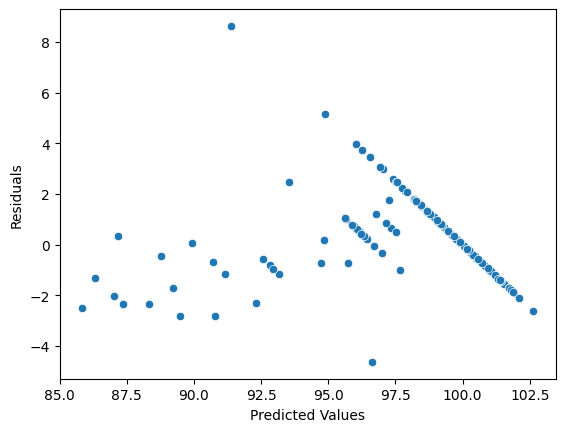

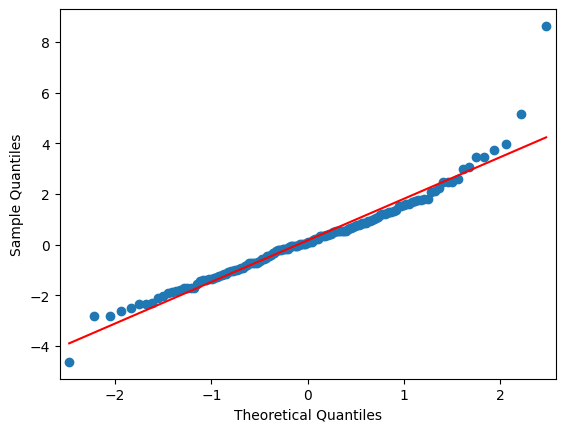

In [256]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    Ridge(grid_ridge.best_params_.get("alpha")),
)
print(
    f"Ridge Regression model with alpha={grid_ridge.best_params_.get('alpha')} and missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Lasso Regression using Polynomial Features

In [257]:
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test, column_names = pre_process_poly(X, y)

grid_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={"alpha": [0.01, 0.1, 1]},
    cv=5,
)

grid_lasso.fit(X_train, y_train)
print("Best parameters found: ", grid_lasso.best_params_)

# Print the best score
print("Best score found: ", grid_lasso.best_score_)

Best parameters found:  {'alpha': 0.1}
Best score found:  0.7941699690715789


Lasso Regression model with alpha=0.1 and missing values set to mean has a MSE of 2.6241618544817813 and R2 of 0.8313266383003688
Age -0.0
Gender 0.0
Bedtime -0.0
Wakeup time 0.0
Sleep duration -0.0
Sleep efficiency -0.0
REM sleep percentage -0.0
Deep sleep percentage -0.0
Light sleep percentage 0.0
Awakenings -0.0
Caffeine consumption 0.0
Alcohol consumption -0.0
Smoking status 0.0
Exercise frequency -0.0


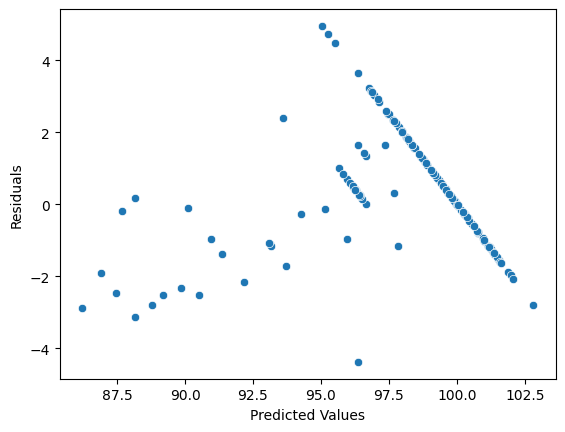

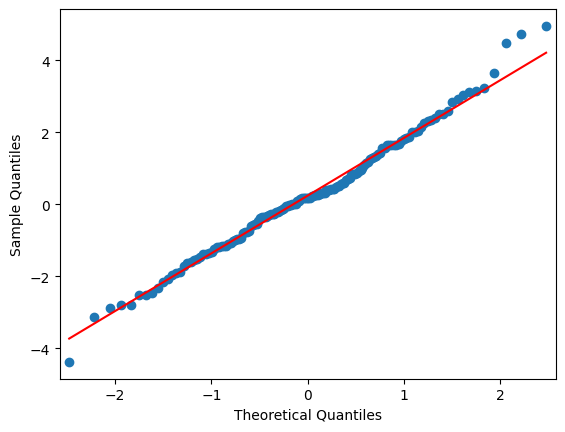

In [258]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    Lasso(grid_lasso.best_params_.get("alpha")),
)
print(
    f"Lasso Regression model with alpha={grid_lasso.best_params_.get('alpha')} and missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

for coefficient, value in coeff.items():
    print(coefficient, value)

check_assumptions(y_pred, y_test)

### Random Forest Regression

In [259]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "n_estimators": [50, 100, 200],
        "min_samples_leaf": [1, 5, 10],
        "ccp_alpha": [0, 0.01, 0.1, 1]
    },
    cv=5,
)

grid_rf.fit(X_train, y_train)
print("Best parameters found: ", grid_rf.best_params_)

print("Best score found: ", grid_rf.best_score_)

Best parameters found:  {'ccp_alpha': 0.01, 'min_samples_leaf': 1, 'n_estimators': 200}
Best score found:  0.8848927695093998


In [260]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    RandomForestRegressor(n_estimators=100, min_samples_leaf=1, ccp_alpha=0.01),
)
print(
    f"Random Forest Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

Random Forest Regression model with missing values set to mean has a MSE of 0.8207373823211428 and R2 of 0.947245428816737


### Random Forest Regression with Polynomial Features

In [263]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test, column_names = pre_process_poly(X, y)

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "n_estimators": [50, 100, 200],
        "min_samples_leaf": [1, 5, 10],
        "ccp_alpha": [0, 0.01, 0.1, 1]
    },
    cv=5,
)

grid_rf.fit(X_train, y_train)
print("Best parameters found: ", grid_rf.best_params_)

print("Best score found: ", grid_rf.best_score_)

Best parameters found:  {'ccp_alpha': 0, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score found:  0.933552764067724


In [264]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    RandomForestRegressor(n_estimators=100, min_samples_leaf=1, ccp_alpha=0),
)
print(
    f"Random Forest Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

Random Forest Regression model with missing values set to mean has a MSE of 0.31037842592592824 and R2 of 0.9800497928850868


### AdaBoost Regression

In [271]:
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test, column_names = pre_process(X, y)

grid_ada = GridSearchCV(
    estimator=AdaBoostRegressor(estimator=LinearRegression()),
    param_grid={
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1]
    },
    cv=5,
)

grid_ada.fit(X_train, y_train)
print("Best parameters found: ", grid_ada.best_params_)

print("Best score found: ", grid_ada.best_score_)

Best parameters found:  {'learning_rate': 0.001, 'n_estimators': 100}
Best score found:  0.3672718548163954


In [272]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100, learning_rate=0.001),
)
print(
    f"AdaBoost Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

AdaBoost Regression model with missing values set to mean has a MSE of 7.143650614306604 and R2 of 0.5408272695280518


### AdaBoost with Polynomial Features

In [267]:
from sklearn.ensemble import AdaBoostRegressor

y = sleep_df.copy().loc[:, "Sleep Quality"]

X_train, X_test, y_train, y_test, column_names = pre_process_poly(X, y)

grid_ada = GridSearchCV(
    estimator=AdaBoostRegressor(estimator=LinearRegression()),
    param_grid={
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1]
    },
    cv=5,
)

grid_ada.fit(X_train, y_train)
print("Best parameters found: ", grid_ada.best_params_)

print("Best score found: ", grid_ada.best_score_)

Best parameters found:  {'learning_rate': 0.0001, 'n_estimators': 200}
Best score found:  0.7370266082191157


In [270]:
model_mse, model_r2, y_pred, y_test, coeff = evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    column_names,
    AdaBoostRegressor(estimator=LinearRegression(), n_estimators=200, learning_rate=0.0001),
)
print(
    f"AdaBoost Regression model with missing values set to mean has a MSE of {model_mse} and R2 of {model_r2}"
)

AdaBoost Regression model with missing values set to mean has a MSE of 2.8597767911648853 and R2 of 0.8161820071225663


## Conclusion

## Next Steps

The Sleep Quality value is a general value based on the typical amount of REM and Deep sleep an adult should receive. The amount of REM and Deep sleep required varies by age. The Sleep Quality calculation should be updated to take age into consideration.

All features were left in for each model since part of this evaluation was the impact of each feature on the prediction but feature selection should be explored to refine the model for Sleep Quality prediction. One of the values of this model is to identify features that impact Sleep Quality so that an individual could make informed decisions.